In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

In [11]:
df = pd.read_csv('pima-indians-diabetes.data.csv')

df

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age,Diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0</pre></body></html>


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
No. pregnant                   768 non-null float64
Plasma glucose                 768 non-null float64
blood pressure                 768 non-null float64
Triceps skin fold thickness    768 non-null float64
2-Hour serum insulin           768 non-null float64
BMI                            768 non-null float64
Diabetes pedigree              768 non-null float64
Age                            768 non-null float64
Diabetes                       768 non-null object
dtypes: float64(8), object(1)
memory usage: 54.2+ KB


In [13]:
df.describe()

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [19]:
df = df.dropna()

In [20]:
df.head(20)

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age,Diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [21]:
df.tail(20)

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age,Diabetes
748,3.0,187.0,70.0,22.0,200.0,36.4,0.408,36.0,1
749,6.0,162.0,62.0,0.0,0.0,24.3,0.178,50.0,1
750,4.0,136.0,70.0,0.0,0.0,31.2,1.182,22.0,1
751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28.0,0
752,3.0,108.0,62.0,24.0,0.0,26.0,0.223,25.0,0
753,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1
754,8.0,154.0,78.0,32.0,0.0,32.4,0.443,45.0,1
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1
756,7.0,137.0,90.0,41.0,0.0,32.0,0.391,39.0,0
757,0.0,123.0,72.0,0.0,0.0,36.3,0.258,52.0,1


In [22]:
df.sample(20)

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age,Diabetes
255,1.0,113.0,64.0,35.0,0.0,33.6,0.543,21.0,1
191,9.0,123.0,70.0,44.0,94.0,33.1,0.374,40.0,0
59,0.0,105.0,64.0,41.0,142.0,41.5,0.173,22.0,0
600,1.0,108.0,88.0,19.0,0.0,27.1,0.400,24.0,0
489,8.0,194.0,80.0,0.0,0.0,26.1,0.551,67.0,0
669,9.0,154.0,78.0,30.0,100.0,30.9,0.164,45.0,0
502,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,1
174,2.0,75.0,64.0,24.0,55.0,29.7,0.370,33.0,0
139,5.0,105.0,72.0,29.0,325.0,36.9,0.159,28.0,0
365,5.0,99.0,54.0,28.0,83.0,34.0,0.499,30.0,0


In [23]:
df = df.drop(767)

df

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age,Diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 766
Data columns (total 9 columns):
No. pregnant                   767 non-null float64
Plasma glucose                 767 non-null float64
blood pressure                 767 non-null float64
Triceps skin fold thickness    767 non-null float64
2-Hour serum insulin           767 non-null float64
BMI                            767 non-null float64
Diabetes pedigree              767 non-null float64
Age                            767 non-null float64
Diabetes                       767 non-null object
dtypes: float64(8), object(1)
memory usage: 59.9+ KB


In [25]:
X = df.drop(['Diabetes'], axis = 1)
X

,No. pregnant,Plasma glucose,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0


In [26]:
y = df['Diabetes']
y

0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    0
766    1
Name: Diabetes, Length: 767, dtype: object

# A. แยก Train, Test dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(f'#traning = {X_train.shape[0]}')
print(f'#validation = {X_val.shape[0]}')
print(f'#test = {X_test.shape[0]}')

#traning = 490
#validation = 123
#test = 154


# B. ทำ Model

In [29]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_val,y_val))

Train on 490 samples, validate on 123 samples
Epoch 1/500
490/490 [==============================] - 0s 219us/sample - loss: 5.2571 - accuracy: 0.6592 - val_loss: 5.8941 - val_accuracy: 0.6179
Epoch 2/500
490/490 [==============================] - 0s 129us/sample - loss: 5.2571 - accuracy: 0.6592 - val_loss: 5.8941 - val_accuracy: 0.6179
Epoch 3/500
490/490 [==============================] - 0s 154us/sample - loss: 5.2571 - accuracy: 0.6592 - val_loss: 5.8941 - val_accuracy: 0.6179
Epoch 4/500
490/490 [==============================] - 0s 170us/sample - loss: 5.2571 - accuracy: 0.6592 - val_loss: 5.8941 - val_accuracy: 0.6179
Epoch 5/500
490/490 [==============================] - 0s 125us/sample - loss: 5.2571 - accuracy: 0.6592 - val_loss: 5.8941 - val_accuracy: 0.6179
Epoch 6/500
490/490 [==============================] - 0s 175us/sample - loss: 5.2571 - accuracy: 0.6592 - val_loss: 5.8941 - val_accuracy: 0.6179
Epoch 7/500
490/490 [==============================] - 0s 125us/sample -

KeyboardInterrupt: 

# C. Plot

In [31]:
model.evaluate(X_test,y_test)[1]

154/154 [==============================] - 0s 98us/sample - loss: 5.4087 - accuracy: 0.6494


0.64935064

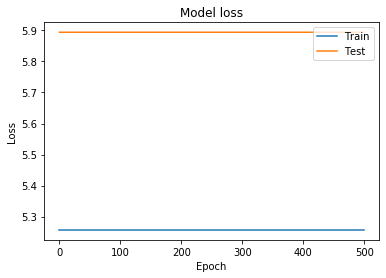

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

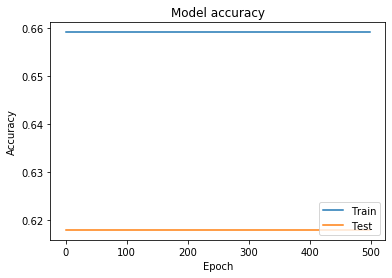

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [37]:
X_train.shape

(490, 8)